<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Прогнозирование-вероятности-оттока-пользователей-для-фитнес-центров" data-toc-modified-id="Прогнозирование-вероятности-оттока-пользователей-для-фитнес-центров-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Прогнозирование вероятности оттока пользователей для фитнес-центров</a></span></li><li><span><a href="#Описание-проекта-и-данных" data-toc-modified-id="Описание-проекта-и-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание проекта и данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span></li><li><span><a href="#Построение-модели-прогнозирования-оттока-клиентов" data-toc-modified-id="Построение-модели-прогнозирования-оттока-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Построение модели прогнозирования оттока клиентов</a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Кластеризация клиентов</a></span></li><li><span><a href="#Выводы-и-базовые-рекомендации-по-работе-с-клиентам" data-toc-modified-id="Выводы-и-базовые-рекомендации-по-работе-с-клиентам-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы и базовые рекомендации по работе с клиентам</a></span></li></ul></div>

## Прогнозирование вероятности оттока пользователей для фитнес-центров

## Описание проекта и данных

На основе данных о посетителях сети фитнес-центров «Культурист-датасаентист» спрогнозировать вероятность оттока для каждого клиента в следующем месяце, сформировать с помощью кластеризации портреты пользователей и подготовить план действий по удержанию клиентов. 
А именно:
- спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- формулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    - выделить целевые группы клиентов;
    - предложить меры по снижению оттока;
    - определить другие особенности взаимодействия с клиентами.

Набор данных включает следующие поля:
- Данные клиента за предыдущий до проверки факта оттока месяц:
    - 'gender' — пол;
    - 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
    - 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
    - 'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
    - 'Phone' — наличие контактного телефона;
    - 'Age' — возраст;
    - 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

- Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
    - 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
    - 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
    - 'Group_visits' — факт посещения групповых занятий;
    - 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
    - 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
    - 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- 'Churn' — факт оттока в текущем месяце.


## Исследовательский анализ данных (EDA)

Загрузка библиотек и данных

In [ ]:
import pandas as pd
import math as mth
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# машинное обучение
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

#доп настройки
pd.options.display.expand_frame_repr = False
import warnings 
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 5,5 # задаем размер графиков, если не задано будет другого
pd.options.display.max_colwidth = 400 # для полного отображения информации внутри столбцов устанавлоиваем параметр функции

In [ ]:
gym_churn = pd.read_csv('/datasets/gym_churn.csv')

Напишем функцию для первичного анализа датафреймов, смотрbv распределение численных значений при помощи describe, приведение названий к нижнему регистру, анализ на наличие дубликатов и пропусков

In [ ]:
def inspect(df):
    df.info() 
    numeric_columns=df.describe().columns
    display(df.describe().T)
    df.columns = [x.lower() for x in df.columns.values]
    print ('Количество дубликатов -', df.duplicated().sum())
    print ('Количество пропусков -', df.isna().sum())
    return df.head(10)

In [ ]:
inspect(gym_churn)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Количество дубликатов - 0
Количество пропусков - gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


**Вывод** : Данные достаточно равномерные, не похоже, что есть выбросы. Дубликатов в данных нет проспусков тоже.

- распределение по полу примерно равномерное
- почти половина клиентов являются сотрудниками компаний-партнеров
- 30% клиентов пришли по акции "Приведи друга"
- мобильные номера оставили 90% клиентов
- средняя длительность абонементов клиентов - 4.5 месяцев
- 40% клиентов посетили групповые занятия
- средний возраст клиентов 29 лет
- средняя суммарная выручка от доп.услуг на клиента - 146.9
- средний срок до окончания договора - 4.3 месяца
- среднее время с момента первого обращения в фитнес-центра - 3.7 месяца
- средняя частота посещений в неделю за все время - 1.87 раз в неделю
- средняя частота посещений за последний месяц - 1.76 раз в неделю
- факт оттока - 26.5%

**Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался**

In [ ]:
gym_churn.groupby('churn').agg('mean').T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


- gender - пол клиента - среднее одинаково, следовательнопризнак не влияет на отток/приток
- near_location - проживание или работа рядом - отток клиентов больше среди тех кто ближе,этот признак слабо влияет на отток
- partner - сотрудник компании-партнера клуба - среди партнеров оттток меньше
- promo_friends - по акции "приведи друга" - отток среди тех кто пришел по акции меньше
- phone - наличие телефона клиента - никакого влияния
- contract_period- длительность абонемента - больший отток у тех у кого нет абонемента, что вполне логично если уже купил абонемент-ходишь, потому что оплатил. Влияние признака на клиентов высокое.
- group_visits - факт посещения групповых программ - удивительно, но отток клиентов среди тех кто ходил н агрупповые программы меньшге, социализация для людей важна и самому заниманится сложнее.
- age - возраст клиента - оказывает слабое влияние.
- avg_additional_charges_total- выручка от других услуг - слабое влияние, похоже людей больше интересует то, что входит в абонемент
- month_to_end_contract - срок до окончания абонемента - больше отток у тех у кого мало осталось
- lifetime - время с первого посещения- чем дольше человек ходит, тем это сильнее закрепляется у него как привычка, отток больше у тех кто недавно купил
- avg_class_frequency_total - среднее частота посещений в неделю -слабое влияние, но все-таки чем чаще клиент ходит тем меньше уходит в отток
- avg_class_frequency_current_month- среднняя частота посещений в неделю за послдений месяц - как и предыдущий пункт, особенно в части тех кто ушел.

**Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)**

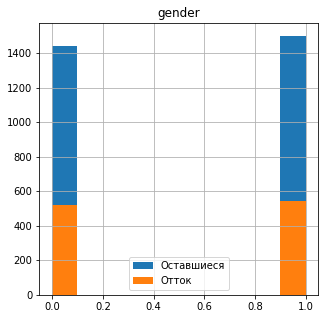

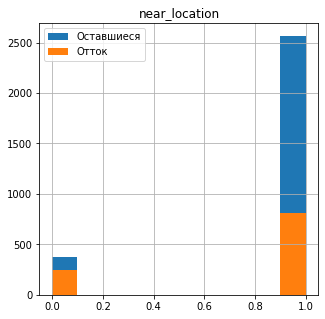

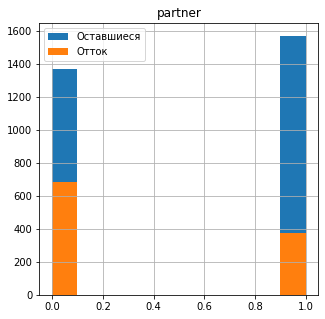

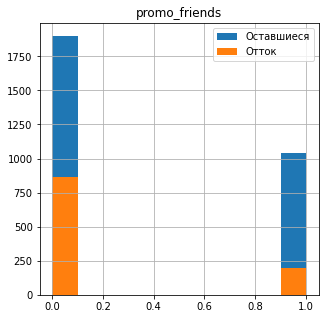

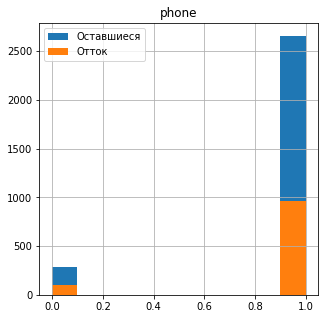

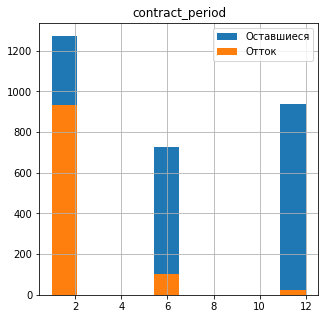

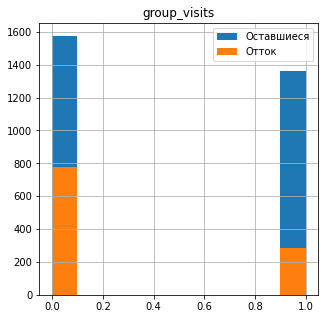

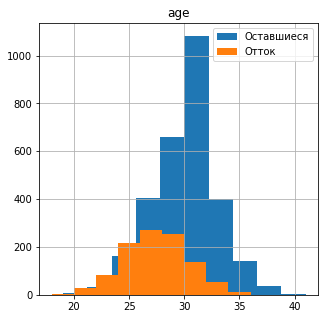

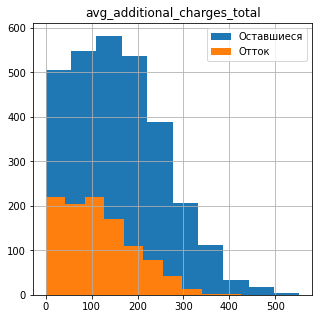

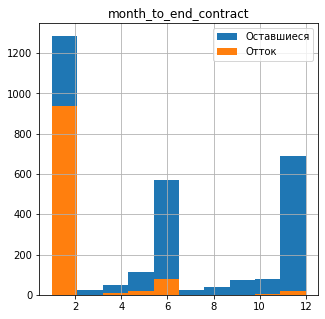

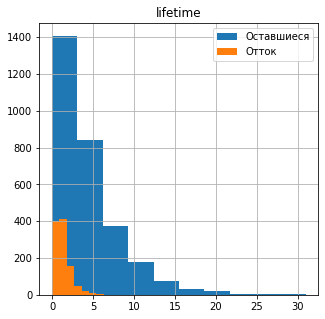

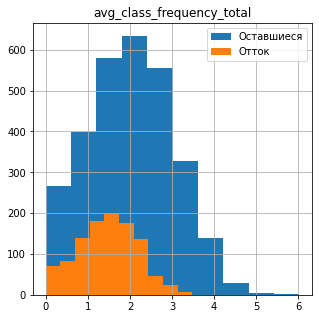

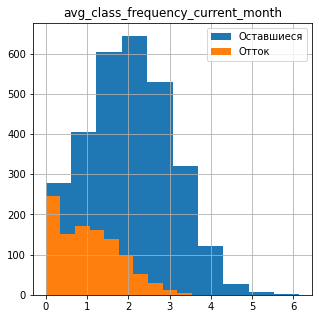

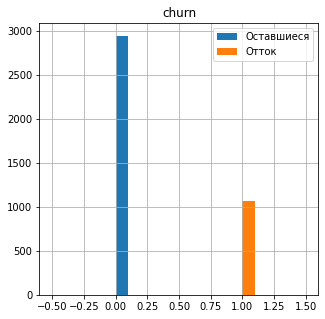

In [ ]:
for column in gym_churn.columns:
    gym_churn.groupby('churn')[column].hist()
    plt.title(column)
    plt.legend(['Оставшиеся', 'Отток'])
    plt.show()

- gender - доли оттока примерно одинаковые
- near_location - клиентов, которые близко живут значительно больше и доля оставшихся среди них больше
- partner  - доли оттока примерно одинаковые.
- promo_friends - доля оттока тех кто не участвовал в акции участников промо-акции значительно меньше
- phone - многие оставляют свой телефон, но на отток это не сильно влияет
- сontract_period - доля оттока больще среди тех кто покупал недолгие абонементы,у кого абонемент на месяц
- group_visits - больше отток среди тех кто не ходил на групповые занятия
- age - распределение похоже на нормальное, отток  клиентов в районе 27 лет, чем старше тем отток меньше. Но и средний возраст клиентов 29 лет
- avg_additional_charges_total - доли ушел/остался мало зависят от трат на доп.услуги. Большая часть клиентов тратит не больше 300 единиц
- month_to_end_contract - чем дольше абонемент, тем у этих клиентов отток меньше
- lifetime - среди тех кто давно ходит оттока почти нет. Основной отток у тех кто ходил до 1-2 месяцев
- avg_class_frequency_total - распределение похоже на нормальное. Клиенты которые ходит до 2 раз в неделю доли оттока примерно одинаковые, но если клиент ходит 3 раза, а если 4-5 раз то отток уменьшается
- avg_class_frequency_current_month - чем чаще клиент ходит в зал за последний месяц, тем и отток меньше (похожая ситуация с предыдущим показателм)

**Построим матрицу корреляции признаков между друг другом**

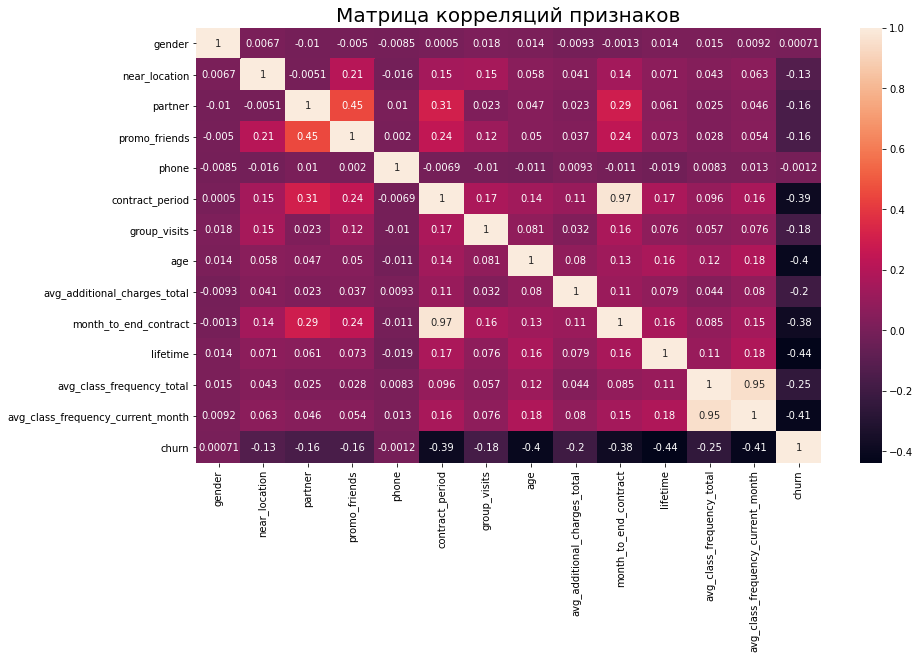

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(data = gym_churn.corr(), annot = True, square=False)
plt.title('Матрица корреляций признаков', fontsize = 20)
plt.show()

Мультиколлинеарные признаки: 
- contract_period - month_to_end_contract 
- avg_class_frequency_current_month - avg_class_frequency_total

С нулевой корреляцией к целевой переменной:
- phone
- gender

Так же можно отметить, что между 'churn' и признаками существует обратная корреляция (кроме gender) - значит, что чем сильнее признак, тем слабее отток.

У признаков 'near_location', 'partner', 'promo_friends', 'group_visits', 'avg_additional_charges_total', 'avg_class_frequency_total' (0,13-0,2) - слабая коррекляция  

У признаков 'contract_period', 'age', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_current_month' (0,38-0,44) - средняя.


## Построение модели прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
1. разбьем данные на обучающую и валидационную выборку функцией train_test_split().
2. обучим модель на train-выборке двумя способами, для выбора лучшей модели:
- логистической регрессией,
- случайным лесом.
3. оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. 
4. опредеим какая модель показывает себя лучше на основании метрик

**Подготовка**

Уберем по одному мультиколлинеарному признаку и перезапишем датасет

In [ ]:
gym_churn_drop = gym_churn.drop(['month_to_end_contract', 'avg_class_frequency_current_month'], axis=1)
gym_churn_drop.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936,0
2,0,1,1,0,1,1,0,28,129.448479,2,1.859098,0
3,0,1,1,1,1,12,1,33,62.669863,2,3.205633,0
4,1,1,1,1,1,1,0,26,198.362265,3,1.113884,0


Разделим данные на набор признаков (матрица X) и целевую переменную (вектор y)

In [ ]:
X = gym_churn.drop('churn', axis=1)
y = gym_churn_drop['churn'] 

Разобьем модель на обучающую и валидационную выборки и примененим стандартизацию. Разделим выборки в соотношении 80 к 20.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#создадим объект класса StandardScaler и применим его к обучающей выборке
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train) 

#применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = sc.transform(X_test) 

Зададим функцию, которая будет выводить наши метрики для разных моделей

In [ ]:
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy (доля правильных ответ): {:.3f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision (точность): {:.3f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall (полнота): {:.3f}'.format(recall_score(y_true, y_pred)))

**Зададим алгоритм для модели логистической регрессии**

In [ ]:
lr_model = LogisticRegression(random_state=0)
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]
# выведем все метрики
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)

Метрики для модели логистической регрессии:
	Accuracy (доля правильных ответ): 0.922
	Precision (точность): 0.854
	Recall (полнота): 0.828


**Зададим алгоритм для модели на основе алгоритма случайного леса**

In [ ]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) # Ваш код здесь
# обучим модель случайного леса
rf_model.fit(X_train, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test)# Ваш код здесь
rf_probabilities = rf_model.predict_proba(X_test)[:,1]# Ваш код здесь
# выведем все метрики
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title='Метрики для модели случайного леса:'
)


Метрики для модели случайного леса:
	Accuracy (доля правильных ответ): 0.916
	Precision (точность): 0.839
	Recall (полнота): 0.818


**Оценка метрик**

По параметру Accuracy: в модели на алгоритме логистической регрессии немного выигрывает у модели случайный лес (0,899 против 0,89)
по precision: тоже логистическая регрессия немного лучше (0,788 проитив 0,784) 
по recall: тоже логистическая регрессия лучше (0,808 против 0,768)

По всем параметрам "Логистическая регрессия" дает результат немного лучше чем случайный лес.

Обе модели показали хорошие результаты по метрикам, но логистическая регрессия немного лучше.
Ключевыми параметрами для прогнозирования оттока, является доля правильных ответов для целевого класса поэтому выбираем логическую регрессию

## Кластеризация клиентов

**Построение матрицы расстояний отрисовка дендрограмму**

In [ ]:
X = gym_churn.drop('churn', axis=1)
y = gym_churn['churn'] 
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward')

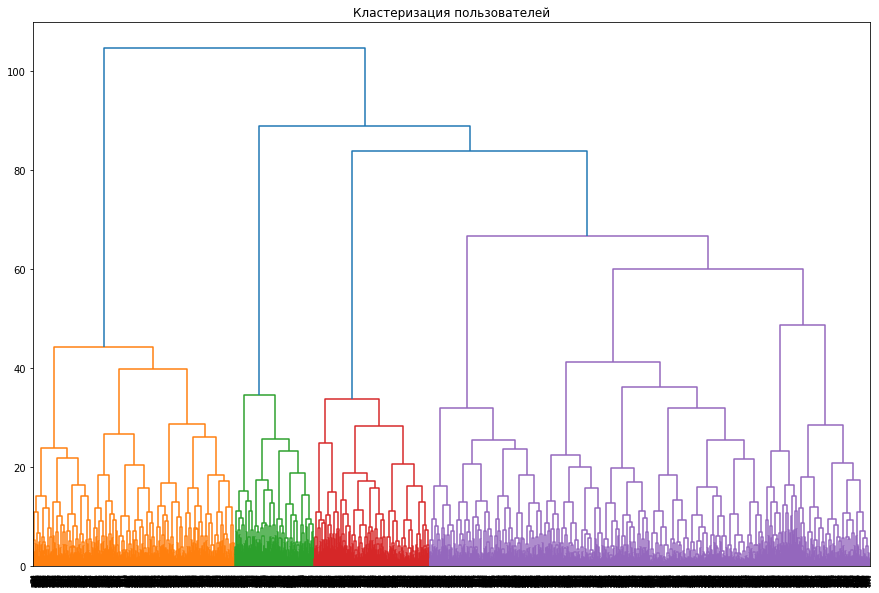

In [ ]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация пользователей')
plt.show()

Предложенное оптимальное число кластеров 4 (4 цвета на графике). По заданию будем использовать 5.

**Обучение модели кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов**

In [ ]:
# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0)
# прогнозируем кластеры для наблюдений
labels = km.fit_predict(X_sc)

In [ ]:
# сохраняем метки кластера в столбец нашего датасета
gym_churn['cluster_km'] = labels
gym_churn.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3


Посмотрим сколько клиентов в кластерах. Выводем статистику по средним значениям наших признаков по кластеру

In [ ]:
gym_churn.groupby(['cluster_km'])['gender'].count()

cluster_km
0    1010
1     385
2     505
3    1262
4     838
Name: gender, dtype: int64

Cамый большой (2 кластер) и самый маленький кластер (4 кластер) отличаются в 3 раза.

**Посчитаем средние значения признаков для кластеров**

In [ ]:
gym_churn.groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
near_location,0.959406,0.862338,0.000000,1.000000,0.976134
partner,0.783168,0.470130,0.463366,0.350238,0.356802
promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
phone,1.000000,0.000000,1.000000,1.000000,0.998807
contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
age,29.982178,29.301299,28.477228,28.167987,30.125298
avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


Описание кластеров:

*Кластер 0*
- Отток - 2,7% - самый низкий
- Высокая доля от партнерской программы 78%
- Высокая доля по акции "приведи друга" - 57%
- Больше всего посещают групповые программы - 54%
- Длительные абонементы - 10 месяцев

Портрет: клиенты, кто купили абонемент на длительный срок по акции или партнерской программе, живут/работают рядом

*Кластер 1*
- Отток - 26%
- Нет телефонных номеров

По остальным не выделились

*Кластер 2*
- Отток - 44%
- Не жувут и наботают близко от фитнес-центра
- Самая низкая доля по акции "приведи друга" - 8%
- Самый низкий процент посещения групповых программ - 21%

Портрет: клиенты, кто живет не близко и пришли без промо-акции, не особо интересны групповые занятия

*Кластер 3*
- Отток - 51%
- Самая редкая частота посещений клуба как в неделю= 1.25
- Так и за неделю в последний месяц = 1.01
- самые короткие абонементы

Портрет: клиенты, которые мало ходят примерно 1 раз в неделю

*Кластер 4*
- Отток - 7% 
- Самая высокаячастота посещений клуба как в неделю= 2,85
- Так и за неделю в последний месяц = 2.85
- Близко живут/работают (ближе всех)

Портрет: чаще всего ходят в фитнес, противоположность 3 кластеру, маленький отток плюс близко живут/работают

**Распределения признаков для кластеров**

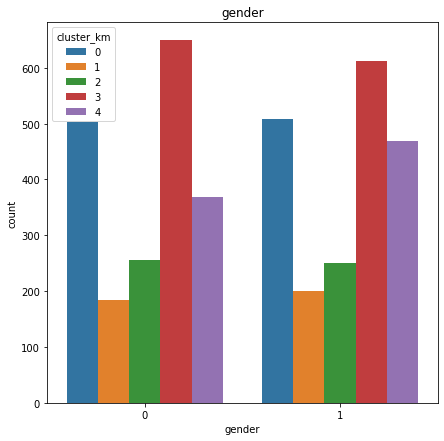

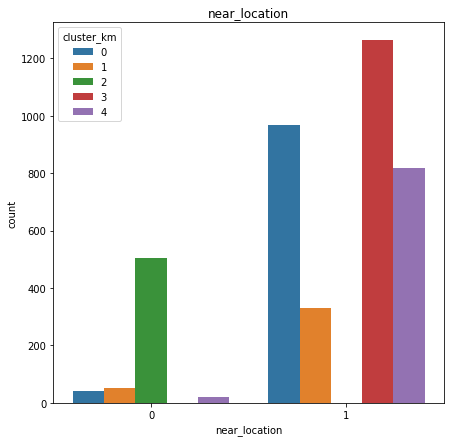

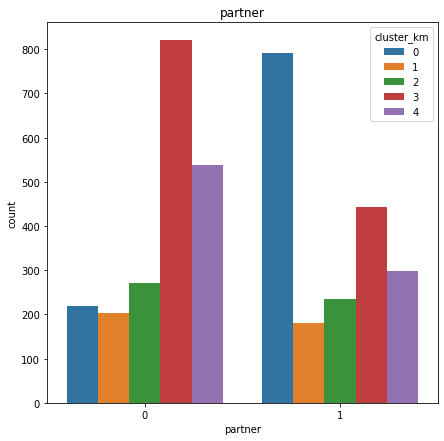

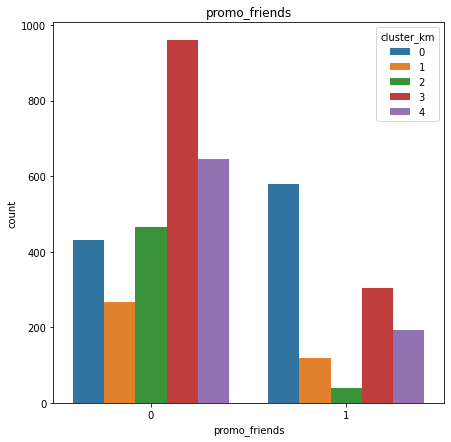

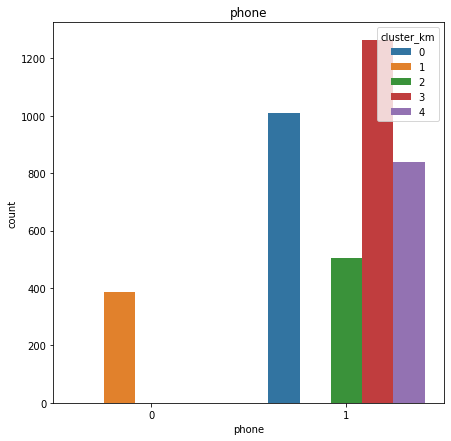

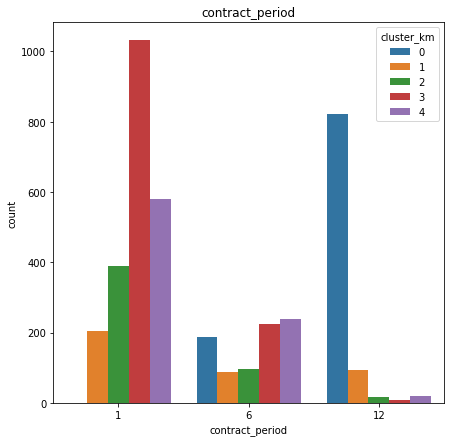

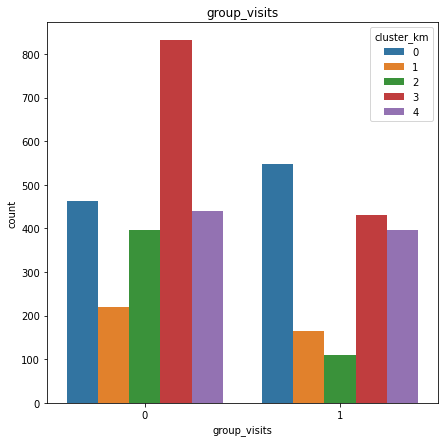

In [ ]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'phone','contract_period','group_visits']:
    plt.figure(figsize=(7, 7))
    sns.countplot(x = gym_churn[column], hue='cluster_km', data=gym_churn)
    plt.title(column)
    plt.show()

- gender - нет особенных закономерностей
- near_location - сильно выделяется Кластер 2- живут неблизко
- partner - Кластеры 1 и 3 - те кто не является партнерами, Кластеры 0 и 4 - являются
- promo_friends - Кластеры 1 и 3 - те кто не является клиентами по акции, Кластеры 0 и 4 - являются (как и в предыдущем)
- phone  - Кластер 1 выделяется - те кто не оставил номер телефона
- contract_period  - Здесь хорошо видно, что абонементы продаются на периоды 1,6,12 месяцев. Кластер 0 состоит преимущественно и клиенгтов с длительным абонементом (12 месяцев), кластер 3 с большим количеством коротких абонементов
- group_visits - Кластер 3 - не любители групповых занятий. Кластер 0 - напротив посещают групповые занятия.

Для непрерывных переменных построим диаграммы размаха

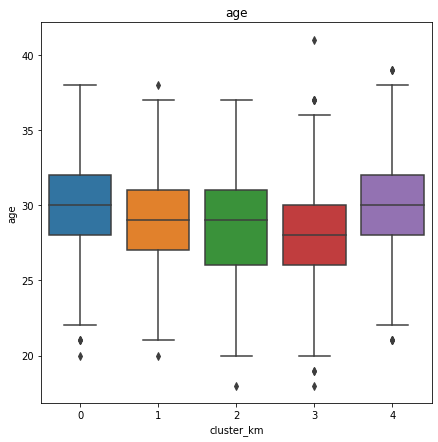

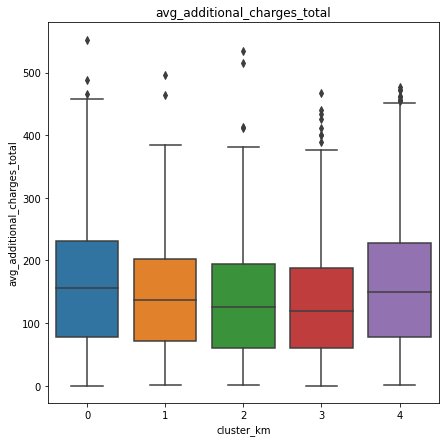

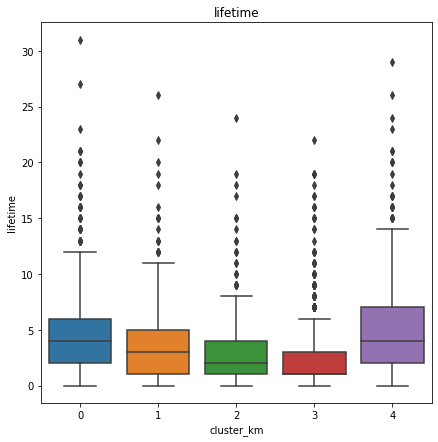

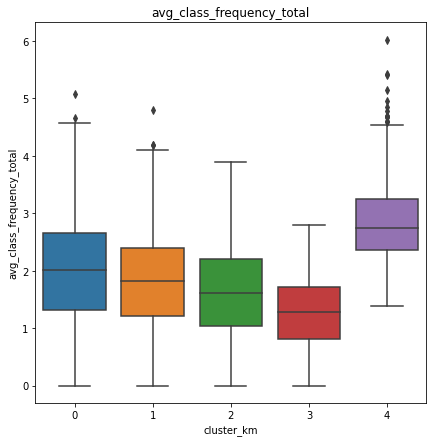

In [ ]:
for column in ['age', 'avg_additional_charges_total', 
               'lifetime', 
               'avg_class_frequency_total']:
    plt.figure(figsize=(7, 7))
    sns.boxplot(x = 'cluster_km', y = gym_churn[column], data = gym_churn)
    plt.title(column)
    plt.show()

- age  - Кластер 3 преимущественно состоит из тех кому меньше 30,а Кластер 0 кому больше 30 лет.
- avg_additional_charges_total - кластеры 0 и 4 тратят больше чем кластеры 1-3
- month_to_end_contract - здесь можно опять выделить кластер 0 - у них самые длительные абонементы, кластеры 2 и 3 самые краткосрочные
- lifetime  - и опять здесь кластеры 4 и 0 дольше ходят, кластер 3 опять самый краткосрочный
- avg_class_frequency_total  - кластер3 - те кто ходит в среднем 1,5 раза, кластер 0 - те кто ходит 2раза, кластер 4 выделяется -тут ходят чаще всего
- avg_class_frequency_current_month - картина аналогична предыдущей переменной

Для каждого полученного кластера посчитаем долю оттока

In [ ]:
gym_churn.query('churn==1').groupby('cluster_km')['churn'].count() / gym_churn.query('churn==1')['churn'].count()

cluster_km
0    0.026390
1    0.097078
2    0.211122
3    0.611687
4    0.053723
Name: churn, dtype: float64

Как и предполагалось самый большой отток в кластере 3 отток аж 61.2%. Самый маленький отток у Кластера 0 (самый длительный абонемент, живут рядом) (2,64%) и Кластера 4 (5,37%)(чаще всего ходят в зал). Клиенты из Кластера 1, те кто не оставляет телефон, склонны ходить, отток небольшой. А вот 2 кластере, клиенты живут или работают далеко, ходят мало, отток большой (21.1%)

## Выводы и базовые рекомендации по работе с клиентам

В результате анализа было принято решение разбить клиентов на 5 кластеров.

**Результаты:**

Кластер 0 - самый лучший, здесь самый маленький отток 2,64%:
Это те клиенты, кто купил абонемент на 12 мес по промо-акции или партнерской программе, ходят довольно часто 2-3раза в неделю, те кому больше 30 лет, многие тратят на допуслуги, также живут или работают рядом

Кластер 1 - отток небольшой (10%), но информативности мало, все чем выделился это то что не оставил номер телефона.

Кластер 2 - оттока довольно велик 21,1%. Клиенты, которые живут не близко и в основном пришли без промо-акции,не интересны групповые занятия

Кластер 3 - здесь отток самый большой 61,2%. Клиенты, которые мало ходят примерно 1 раз в неделю, не длительный абонемент,те кто не особо является партнерами и без промо-акций,не интересны групповые занятия

Кластер 4 - отток небольшой 5,37% (от всего оттока):
Это клиенты которые ходят чаще всего, больше 3 раз в неделю, близко живут или работают.

При это 1 кластер был самый маленький всего 385 клиентов, а 3 клстер самый большо1 1262 клиента

**Рекомендации:**
- предлагать партнерские программы и промо-акции, довольно неплохо работают;
- создавать больше интересных групповых программ;
- делать беплатные пробные групповые занятия, чтобы клиенты-одиночки смогли вливаться в жизнь фитнес-центра;
- доп. услуги особо не интресны;
- делать более выгодными абонементы на длительный срок;
- уделять рекламе и распространению на тех кто живет или работает близко;
- поощрать клиентов, которые посещают фитнес 3 и более раз в неделю, различными скидками.